<a href="https://colab.research.google.com/github/pratikktiwari/ML-Learnings/blob/main/01_Neural_Network_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow
There are many definitions for a regression problem but in our case, we're going to to simplify it: predicting numerical variables based on some other combination of variables, even shorter... predicting number.

In [1]:
# Import TensforFlow
import tensorflow as tf
print(tf.__version__)

2.8.2


## Creating data to view and fit

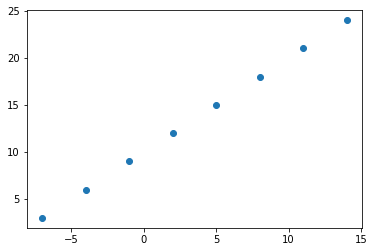

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X,y)

In [46]:
# Relationship

y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [47]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [48]:
X[0], y[0]

(-7.0, 3.0)

In [49]:
X[1], y[1]

(-4.0, 6.0)

In [50]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [51]:
# Scalar has no shape
X[0].ndim

0

In [52]:
X[0], y[0]

(-7.0, 3.0)

In [57]:
# Turn our NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [58]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

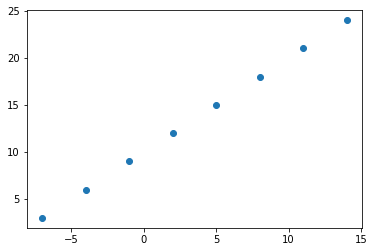

In [59]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow
1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the ***loss function*** (in other words, the function which tells out model how wrong it is) and the ***optimizer*** (tells our model how to improve the patterns it is learning) and ***evaluation metrics*** (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

![image.png](https://raw.githubusercontent.com/pratikktiwari/ML-Learnings/main/resources/regression-steps.png?token=GHSAT0AAAAAABQ3M2PPCKOGBQU5BDUWWXZUYVURCGA)

* **Loss**: How wrong the model's predictions are compared to the truth labels (this should be minimized)
* **Optimizer**: How the model should update its internal patterns to better its predictions
* **Metrics**: Human interpretable values for how well the model is doing
* **Epochs**: How many times the model will go through all of the training examples

In [82]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API

model = tf.keras.Sequential(
    [tf.keras.layers.Dense(1, input_shape=[1])] # take 1 neuron, shape of a single feature
)

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # Mean absolute error => comparision of predicted vs observed => loss = mean(abs(y_true - y_pred), axis=-1)
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochasitc gradient descent => tells neural network how it should improve
              metrics=["mae"]) 

# Fit the model
model.fit(X, y, epochs=5) # Look at X and y and figure out pattern. Try 5 times.



Epoch 1/5
1/1 [==============================] - 0s 434ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748


In [83]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [84]:
# Try and make a prediction using our trained model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [85]:
y_pred + 11 # loss = 10.9 ~ 11

array([[23.71602]], dtype=float32)

## Improving our model
We can improve our mode, by altering the steps we took to create a model.
1. **Creating a model** - we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation function of each layer.
3. **Compiling a model** - we might change the optimization function or perhaps the **learning rate** of the optimization function.
4. **Fitting a model** - we might fit a model for more **epochs** (leave it training for longer) or on more data (give more examples to the model to learn from)

In [99]:
# Let's rebuild our model with higher epoch for fitting

# Create the model
model = tf.keras.Sequential(
  [tf.keras.layers.Dense(1, input_shape=[1])]
)

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 255ms/step - loss: 19.2532 - mae: 19.2532
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 18.9720 - mae: 18.9720
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 18.6907 - mae: 18.6907
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 18.4095 - mae: 18.4095
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 18.1282 - mae: 18.1282
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 17.8470 - mae: 17.8470
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 17.5657 - mae: 17.5657
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 17.2845 - mae: 17.2845
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 17.0032 - mae: 17.0032
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 16.7220 - mae: 16.7220
Epoch 11/100
1/1 [==============================] - 0

In [100]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [102]:
# Check if model prediction has improved
model.predict([17.0])

array([[29.22438]], dtype=float32)

In [103]:
# Alter layers and check accuracy
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, input_shape=[1])
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 547ms/step - loss: 13.3994 - mae: 13.3994
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 13.3981 - mae: 13.3981
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 13.3967 - mae: 13.3967
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 13.3954 - mae: 13.3954
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 13.3941 - mae: 13.3941
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 13.3928 - mae: 13.3928
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 13.3914 - mae: 13.3914
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 13.3901 - mae: 13.3901
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 13.3888 - mae: 13.3888
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 13.3875 - mae: 13.3875
Epoch 11/100
1/1 [==============================] - 0s 

In [104]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [113]:
model.predict([17.0])
# To DO ^^^^

array([[-1.8429513 ,  3.2964416 ,  3.2298732 ,  1.2524989 ,  2.4531443 ,
         4.660363  , -0.7309248 ,  0.16580184, -1.4751815 , -1.9281203 ,
         1.358767  , -2.168755  , -1.5543343 ,  4.255847  , -2.4851825 ,
        -2.0449595 ,  2.2463615 ,  3.3278382 , -0.22690026, -1.8591623 ,
         0.49859866,  2.4206479 ,  2.7338028 ,  4.6400366 ,  0.8603649 ,
         2.8073876 , -3.4604151 , -2.0942223 , -2.322374  ,  3.9824963 ,
         4.2805357 ,  4.04103   ,  1.6861691 ,  2.8500812 ,  3.7339988 ,
         4.5728416 ,  0.35140565,  3.3595583 , -3.4233341 , -0.5782769 ,
         4.257764  ,  4.393013  ,  1.1046216 , -2.064174  ,  3.4517393 ,
         4.272791  ,  1.8899304 ,  3.3143427 ,  0.36897516,  0.40241387,
        -0.18576472,  2.4236903 , -0.03168455, -0.15803567, -3.2826018 ,
         1.4849055 ,  1.1970472 ,  1.4373878 ,  0.17915305,  0.9705483 ,
        -1.6303892 , -1.3983164 , -2.2469623 ,  0.58806795,  0.3871995 ,
         1.4581261 ,  4.4811077 ,  1.5175301 ,  2.4